### Importação dos dados



In [1]:
import pandas as pd

In [2]:
loja = pd.read_csv('./base_dados/loja_1.csv')
loja2 = pd.read_csv('./base_dados/loja_2.csv')
loja3 = pd.read_csv('./base_dados/loja_3.csv')
loja4 = pd.read_csv('./base_dados/loja_4.csv')

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [3]:
# Criação de um dataframe individual para cada loja, em lista.
lojas = [loja, loja2, loja3, loja4]

# Cálculo da coluna 'Preço'com o método sum, exibindo o resultado para cada loja.
print(f'Loja 1 = {lojas[0]["Preço"].sum():,.2f}')
print(f'Loja 2 = {lojas[1]["Preço"].sum():,.2f}')
print(f'Loja 3 = {lojas[2]["Preço"].sum():,.2f}')
print(f'Loja 4 = {lojas[3]["Preço"].sum():,.2f}')

Loja 1 = 1,534,509.12
Loja 2 = 1,488,459.06
Loja 3 = 1,464,025.03
Loja 4 = 1,384,497.58


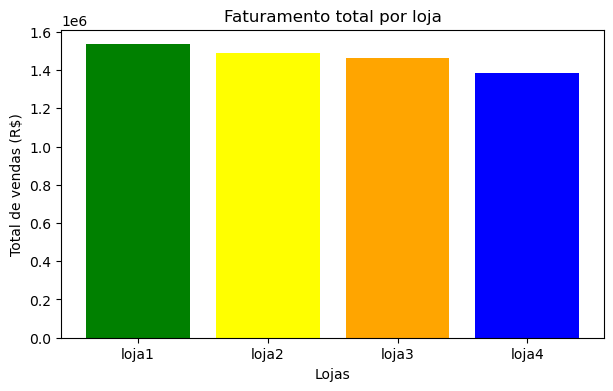

In [4]:
import matplotlib.pyplot as plt

faturamento_vendas = [
    lojas[0]['Preço'].sum(),
    lojas[1]['Preço'].sum(),
    lojas[2]['Preço'].sum(),
    lojas[3]['Preço'].sum()
]

nome_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
colors = ('green', 'yellow', 'orange', 'blue')
plt.figure(figsize=(7, 4))
plt.bar(nome_lojas, faturamento_vendas, color= colors)

plt.title('Faturamento total por loja')
plt.xlabel('Lojas')
plt.ylabel('Total de vendas (R$)')

plt.show()

# 2. Vendas por Categoria

In [5]:
# Visualização do total de vendas de acordo com as categorias
loja_1 = loja.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_2 = loja2.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_3 = loja3.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_4 = loja4.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)

# Impressão dos resultados com identificação de cada loja
print(f'\nLoja 1 = ', loja_1)
print(f'\nLoja 2 = ', loja_2)
print(f'\nLoja 3 = ', loja_3)
print(f'\nLoja 4 = ', loja_4)


Loja 1 =  Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: Produto, dtype: int64

Loja 2 =  Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: Produto, dtype: int64

Loja 3 =  Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: Produto, dtype: int64

Loja 4 =  Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
espor

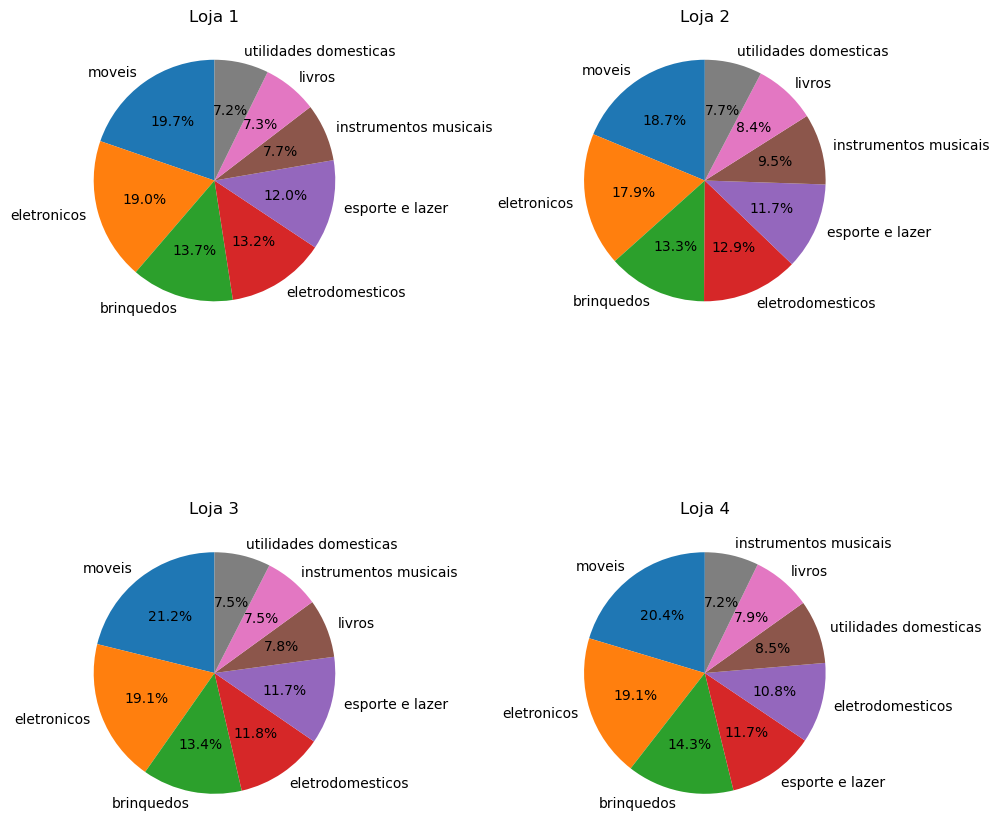

In [6]:
# Agrupamento das categorias e contagem dos produtos vendidos por categoria em cada loja.
loja_1 = loja.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_2 = loja2.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_3 = loja3.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
loja_4 = loja4.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)

# Gráficos pizza para cada loja, mostrando o percentual
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].pie(loja_1, labels=loja_1.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Loja 1')

axs[0, 1].pie(loja_2, labels=loja_2.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Loja 2')

axs[1, 0].pie(loja_3, labels=loja_3.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Loja 3')

axs[1, 1].pie(loja_4, labels=loja_4.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Loja 4')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [7]:
# Cálculo da média de avaliação de cada compra
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

# Resultado por loja.
print(f'Loja 1 =  {media_loja1:.2f}')
print(f'Loja 2 =  {media_loja4:.2f}')
print(f'Loja 3 =  {media_loja4:.2f}')
print(f'Loja 4 =  {media_loja4:.2f}')

Loja 1 =  3.98
Loja 2 =  4.00
Loja 3 =  4.00
Loja 4 =  4.00


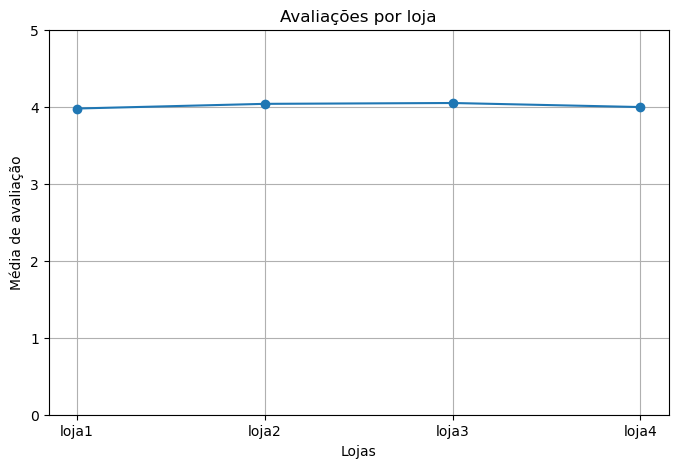

In [8]:
import matplotlib.pyplot as plt

medias = [
    loja['Avaliação da compra'].mean(),
    loja2['Avaliação da compra'].mean(),
    loja3['Avaliação da compra'].mean(),
    loja4['Avaliação da compra'].mean()
]
nome_lojas = ['loja1', 'loja2', 'loja3', 'loja4']

plt.figure(figsize=(8, 5))
plt.plot(nome_lojas, medias, marker='o')
plt.title('Avaliações por loja')
plt.xlabel('Lojas')
plt.ylabel('Média de avaliação')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# 4. Produtos Mais e Menos Vendidos

-------------------------Loja 1--------------------------
Os produtos mais vendidos: 
Produto
TV Led UHD 4K    60
Guarda roupas    60
Micro-ondas      60
Name: count, dtype: int64

Os produtos menos vendidos: 
Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64
---------------------------------------------------------------


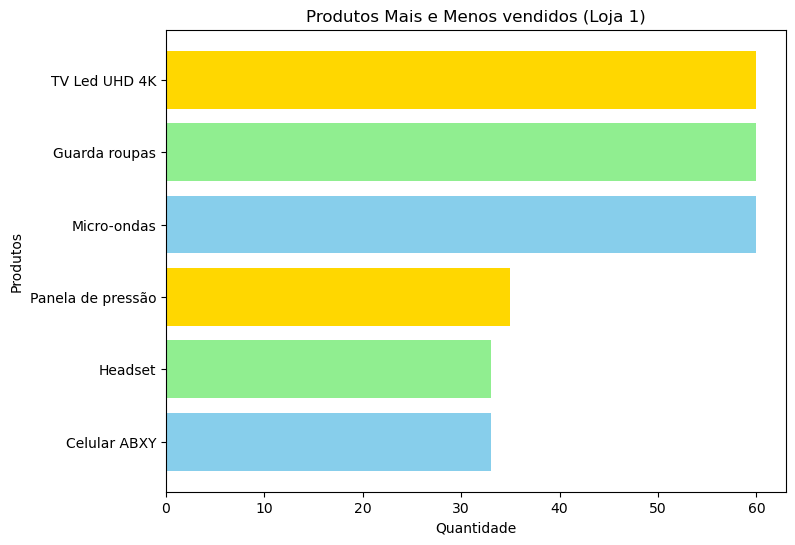

-------------------------Loja 2--------------------------
Os produtos mais vendidos: 
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Os produtos menos vendidos: 
Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64
---------------------------------------------------------------


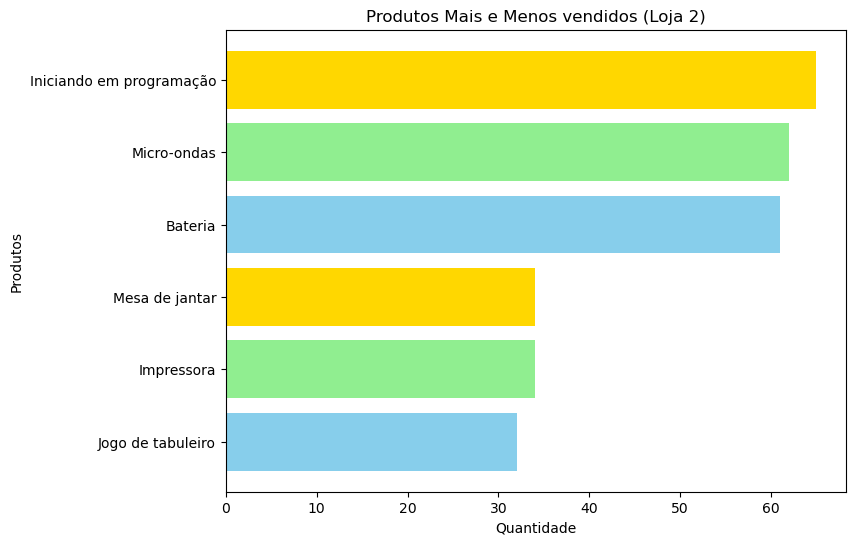

-------------------------Loja 3--------------------------
Os produtos mais vendidos: 
Produto
Kit banquetas     57
Cama king         56
Mesa de jantar    56
Name: count, dtype: int64

Os produtos menos vendidos: 
Produto
Micro-ondas         36
Jogo de copos       36
Blocos de montar    35
Name: count, dtype: int64
---------------------------------------------------------------


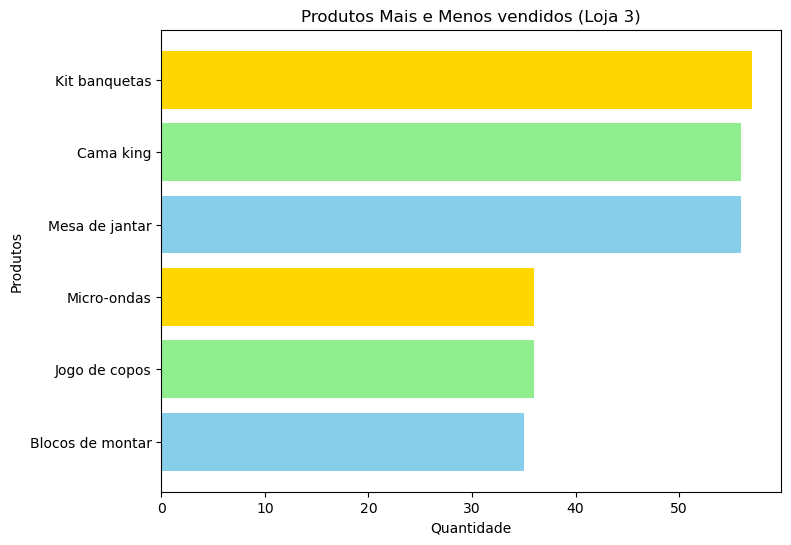

-------------------------Loja 4--------------------------
Os produtos mais vendidos: 
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64

Os produtos menos vendidos: 
Produto
Violão           37
Guarda roupas    34
Guitarra         33
Name: count, dtype: int64
---------------------------------------------------------------


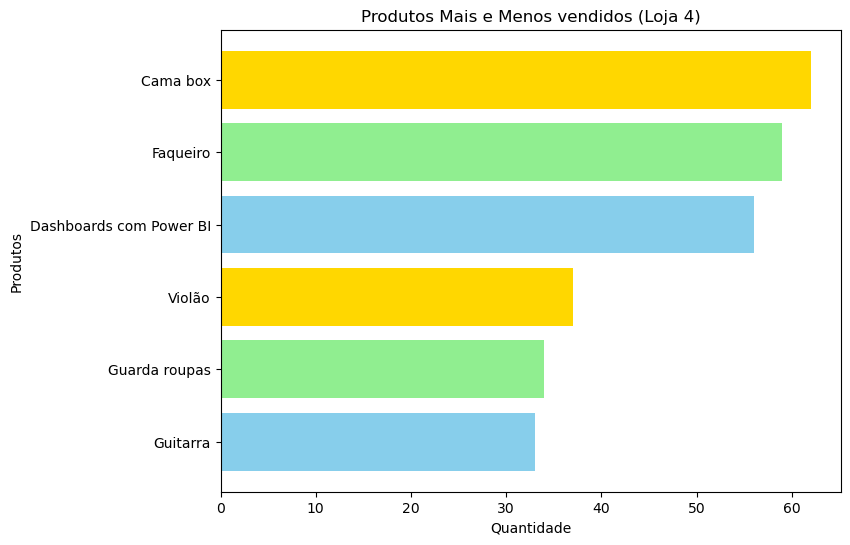

In [9]:
#Levantamento da contagem de vendas, de cada loja
lojas = [loja, loja2, loja3, loja4]
nome_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
for i, loja_atual in enumerate(lojas):
    maisVendidos = loja_atual['Produto'].value_counts().head(3)
    menosVendidos = loja_atual['Produto'].value_counts().tail(3)
    print(f'-------------------------{nome_lojas[i]}--------------------------')
    print(f'Os produtos mais vendidos: \n{maisVendidos}\n')
    print(f'Os produtos menos vendidos: \n{menosVendidos}')
    print(f'---------------------------------------------------------------')

    # Geração do gráfico em barras horizontais
    colors = ('skyblue', 'lightgreen', 'gold')
    plt.figure(figsize=(8, 6))
    plt.barh(menosVendidos.index[::-1], menosVendidos.values[::-1], color= colors)
    plt.barh(maisVendidos.index[::-1], maisVendidos.values[::-1], color= colors)
    plt.title(f'Produtos Mais e Menos vendidos ({nome_lojas[i]})')
    plt.xlabel('Quantidade')
    plt.ylabel('Produtos')
    plt.show()

# 5. Frete Médio por Loja


In [10]:
#Cálculo do médie de frete para cada loja.
frete_media1 = loja['Avaliação da compra'].mean()
frete_media2 = loja2['Avaliação da compra'].mean()
frete_media3 = loja3['Avaliação da compra'].mean()
frete_media4 = loja4['Avaliação da compra'].mean()

# Impressão da média para cada loja, individualmente

print(f'Loja 1 =  R$ {frete_media1.round(2)}')
print(f'Loja 2 =  R$ {frete_media2.round(2)}')
print(f'Loja 3 =  R$ {frete_media3.round(2)}')
print(f'Loja 4 =  R$ {frete_media4.round(2)}')

Loja 1 =  R$ 3.98
Loja 2 =  R$ 4.04
Loja 3 =  R$ 4.05
Loja 4 =  R$ 4.0


# Relatório Final

De acordo com as análises, realizadas através dos respectivos dados obtidos temos o seguinte contexto no âmbito geral de cada categoria.

### 1 - Faturamento

Nesse primeiro relatório, fica evidente que a Loja 4 obteve um faturamento abaixo da média perante as demais lojas. Após verificar a diferença percentual utilizando a loja 1 como ponto de referência por ter tido o maior valor em lucro, temos os seguintes resultados:

- A Loja 2 teve uma receita aproximadamente 3.00% menor que a Loja 1.
- A Loja 3 teve uma receita aproximadamente 4.60% menor que a Loja 1.
- A Loja 4 teve uma receita aproximadamente 9.77% menor que a Loja 1.

### 2 - Vendas por Categoria

**Móveis, eletrônicos e brinquedos** ganham destaque em todas as lojas, onde a maior categoria (móveis) torna-se a mais vendida por todas, tendo apenas a diferença percentual entre a loja 3 e loja 4 de apenas, **3.92%**. As categorias livros e instrumentos eletrônicos são as que apresentam baixo volume de vendas.

### 3 - Média da Avaliação das Lojas

De acordo com a avaliação geral, percebe-se que o índice percentual não ultrapassa **1.76%**.

### 4 - Produtos Mais e Menos Vendidos

Embora haja uma variedade de mercadorias, observamos diferenças claras nos produtos que mais atraíram ou menos interessaram os clientes. Aqui estão os destaques:

**Loja 1:**

TV Led 4K, Guarda-roupas e Micro-ondas foram igualmente populares, cada um vendendo 60 unidades. Isso sugere que eletrodomésticos e móveis são prioridade para os clientes, embora Panela de pressão (35 unidades), Headset e Celular ABXY (33 unidades cada) tiveram menor procura, indicando que itens de tecnologia e utensílios específicos podem não estar alinhados com a demanda local.

**Loja 2:**

O livro Iniciando em Programação liderou com 65 vendas, seguido por Micro-ondas (62) e Baterias (61). Isso mostra uma mistura de interesse em educação, eletrodomésticos e itens práticos. Mesa de jantar, Impressora (34 cada) e Jogo de tabuleiro (32) tiveram baixo desempenho, sugerindo que produtos para lazer e móveis grandes podem não ser prioridade aqui.

**Loja 3:**

Kit de banquetas (57), Cama king e Mesa de jantar (56 cada) foram os favoritos, reforçando que móveis para casa são o foco principal dos compradores. Micro-ondas (36), Jogo de copos (36) e Blocos de montar (35) tiveram menos saída, o que é curioso, já que o Micro-ondas foi bem-sucedido em outras lojas.

**Loja 4:**

Cama box (62), Faqueiro (59) e um curso/material *Dashboards com Power BI* (56) se destacaram, combinando necessidades domésticas com interesse em aprendizado prático. Enquanto isto, Violão com 37 vendas, Guarda-roupas (34) e Guitarra (33) foram menos procurados, indicando que instrumentos musicais e móveis específicos não são prioridade.

### 5 - Frete Médio por Loja.

A Loja 1 foi a que teve a menor média em relação às demais. As Lojas 2 e 3 foi as tiveram um custo elevado, seguidas pela Loja 4.

## Conclusão

A loja 4 é o estabelecimento que menos apresenta uma receita significativa que acarrete num plano de reestruturação ou estratégia de vendas. Embora seja possível alinhar os fatores de negócios para que a mesma continue fechando, o Sr. João pode optar por encerrá-la, deixando as demais abertas. Caso o mesmo deseje a permanência da loja, pode optar por realizar parcerias com outras empresas e até mesmo aplicar o método de vendas online (e-commerce) caso ainda não possua, promovendo comodidade e aumento nas receitas, mediante análise profunda para identificar e mitigar os problemas.

# Mapeamento de vendas por loja

## Gráficos de Dispersão

Resolvi gerar além dos gráficos, uma representação textual do total de vendas de cada produto vendido, de acordo com as coordenadas, para auxiliar na tomada de decisões.

-------------------------Loja 1--------------------------
Total de vendas por latitude e longitude: 
      lat    lon  Vendas
0  -30.17 -53.50     155
1  -27.45 -50.95      95
2  -24.89 -51.55     128
3  -22.25 -42.66     298
4  -22.19 -48.79     984
5  -20.51 -54.54      18
6  -19.19 -40.34      38
7  -18.10 -44.38     265
8  -15.98 -49.86      51
9  -15.83 -47.86      53
10 -13.29 -41.71      75
11 -12.64 -55.42      22
12 -10.83 -63.34       5
13 -10.57 -37.45      14
14  -9.62 -36.82      15
15  -9.46 -48.26      11
16  -8.77 -70.55       1
17  -8.38 -37.86      31
18  -7.28 -36.72      14
19  -6.60 -42.28       6
20  -5.81 -36.59       9
21  -5.42 -45.44      10
22  -5.20 -39.53      32
23  -3.79 -52.48      22
24  -3.47 -65.10       3
25   1.41 -51.77       4

---------------------------------------------------------------


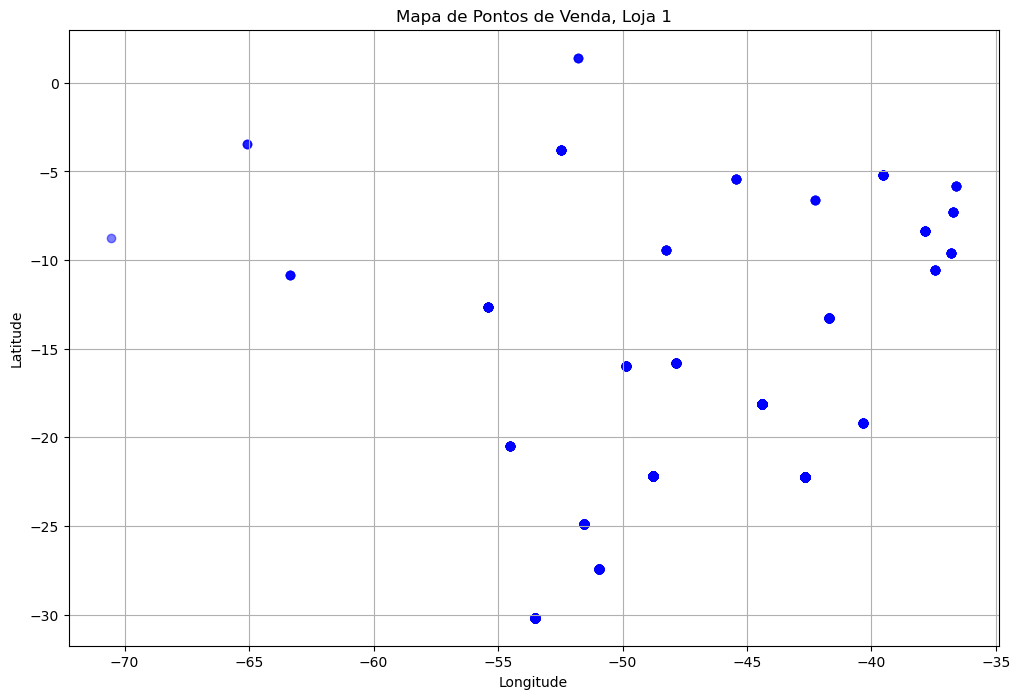

-------------------------Loja 2--------------------------
Total de vendas por latitude e longitude: 
      lat    lon  Vendas
0  -30.17 -53.50     124
1  -27.45 -50.95      94
2  -24.89 -51.55      98
3  -22.25 -42.66     311
4  -22.19 -48.79     985
5  -20.51 -54.54      19
6  -19.19 -40.34      34
7  -18.10 -44.38     283
8  -15.98 -49.86      59
9  -15.83 -47.86      70
10 -13.29 -41.71      78
11 -12.64 -55.42      20
12 -10.83 -63.34       4
13 -10.57 -37.45       4
14  -9.62 -36.82      13
15  -9.46 -48.26       6
16  -8.77 -70.55       1
17  -8.38 -37.86      50
18  -7.28 -36.72      12
19  -6.60 -42.28       6
20  -5.81 -36.59      13
21  -5.42 -45.44      14
22  -5.20 -39.53      40
23  -3.79 -52.48      16
24  -3.47 -65.10       4
25   1.99 -61.33       1

---------------------------------------------------------------


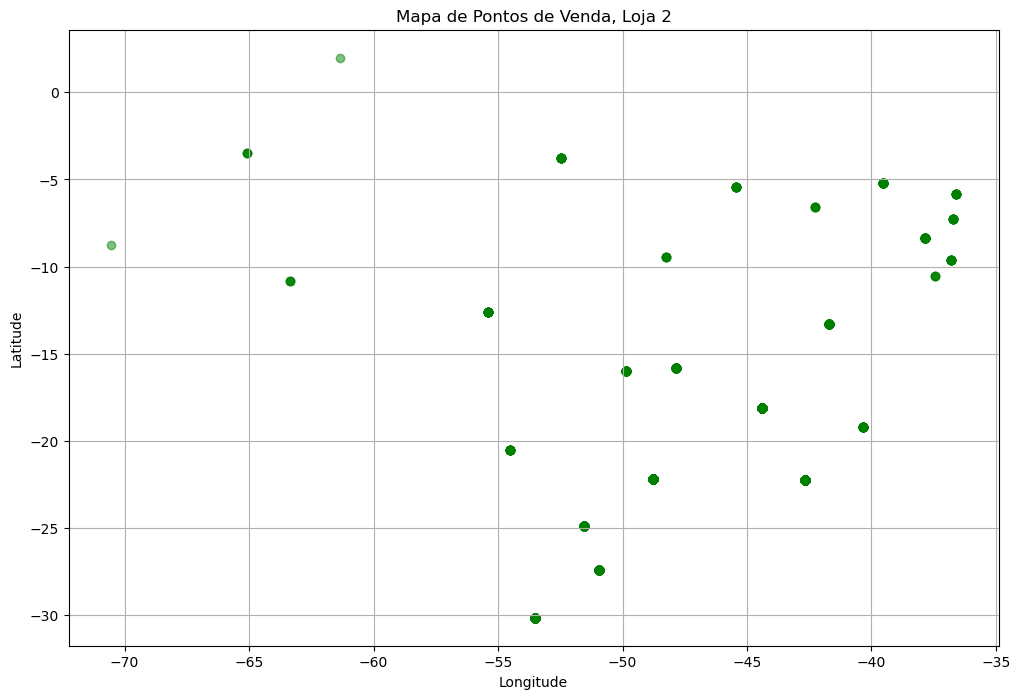

-------------------------Loja 3--------------------------
Total de vendas por latitude e longitude: 
      lat    lon  Vendas
0  -30.17 -53.50     128
1  -27.45 -50.95      77
2  -24.89 -51.55     120
3  -22.25 -42.66     295
4  -22.19 -48.79     983
5  -20.51 -54.54      18
6  -19.19 -40.34      57
7  -18.10 -44.38     285
8  -15.98 -49.86      44
9  -15.83 -47.86      56
10 -13.29 -41.71      77
11 -12.64 -55.42      22
12 -10.83 -63.34       6
13 -10.57 -37.45       7
14  -9.62 -36.82       7
15  -9.46 -48.26       5
16  -8.77 -70.55       1
17  -8.38 -37.86      50
18  -7.28 -36.72       6
19  -6.60 -42.28      10
20  -5.81 -36.59      10
21  -5.42 -45.44      19
22  -5.20 -39.53      44
23  -3.79 -52.48      26
24  -3.47 -65.10       3
25   1.41 -51.77       2
26   1.99 -61.33       1

---------------------------------------------------------------


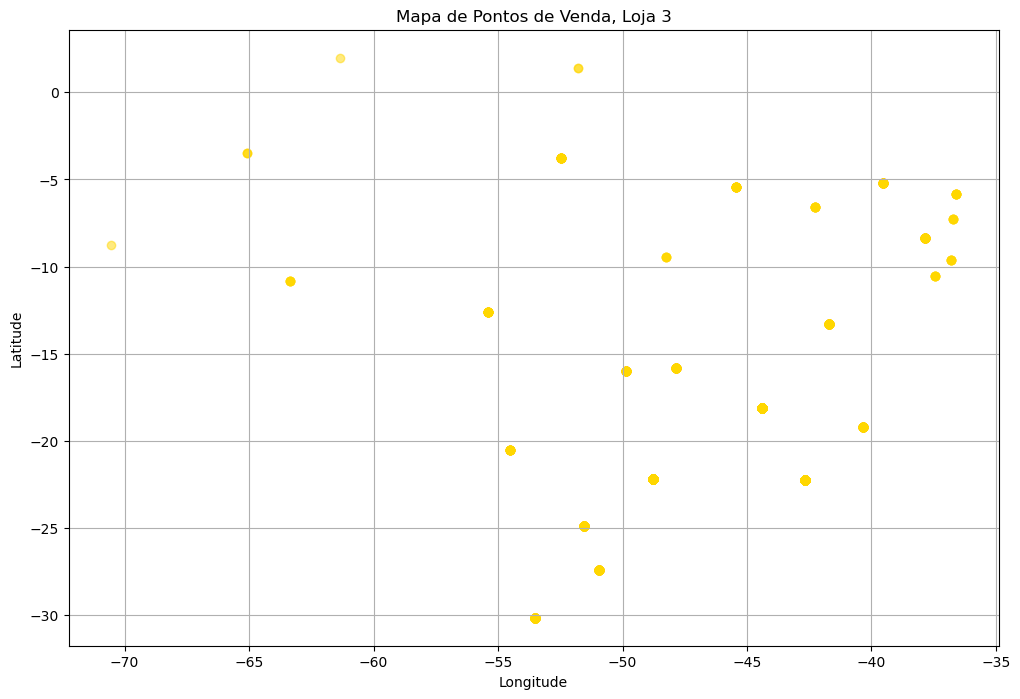

-------------------------Loja 4--------------------------
Total de vendas por latitude e longitude: 
      lat    lon  Vendas
0  -30.17 -53.50     127
1  -27.45 -50.95      80
2  -24.89 -51.55     127
3  -22.25 -42.66     308
4  -22.19 -48.79     991
5  -20.51 -54.54      27
6  -19.19 -40.34      42
7  -18.10 -44.38     269
8  -15.98 -49.86      32
9  -15.83 -47.86      63
10 -13.29 -41.71      80
11 -12.64 -55.42      16
12 -10.83 -63.34       4
13 -10.57 -37.45       3
14  -9.62 -36.82       6
15  -9.46 -48.26       7
16  -8.38 -37.86      50
17  -7.28 -36.72      14
18  -6.60 -42.28      18
19  -5.81 -36.59      16
20  -5.42 -45.44      19
21  -5.20 -39.53      35
22  -3.79 -52.48      17
23  -3.47 -65.10       4
24   1.41 -51.77       3

---------------------------------------------------------------


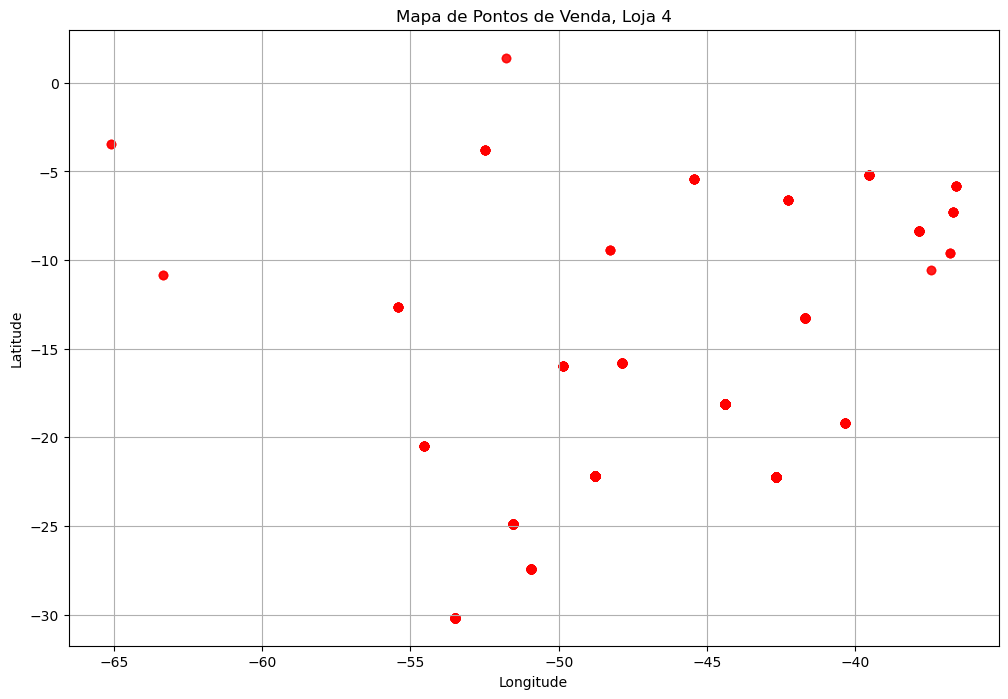

In [11]:
# Total de vendas de cada produto de acordo com as cooordenadas
lojas = [loja, loja2, loja3, loja4]
nome_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['blue', 'green', 'gold', 'red']
for i, loja_atual in enumerate(lojas):
    mapaVendas = loja_atual.groupby(['lat', 'lon'])['Produto'].count().reset_index(name='Vendas')
    print(f'-------------------------{nome_lojas[i]}--------------------------')
    print(f'Total de vendas por latitude e longitude: \n{mapaVendas}\n')
    print(f'---------------------------------------------------------------')

# Gráficos de dispersão
    plt.figure(figsize=(12, 8))
    plt.scatter(loja_atual['lon'], loja_atual['lat'], c=cores[i], alpha=0.5, label=nome_lojas[i])
    plt.title(f'Mapa de Pontos de Venda, {nome_lojas[i]}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

      lat    lon  Vendas
0  -30.17 -53.50     534
1  -27.45 -50.95     346
2  -24.89 -51.55     473
3  -22.25 -42.66    1212
4  -22.19 -48.79    3943
5  -20.51 -54.54      82
6  -19.19 -40.34     171
7  -18.10 -44.38    1102
8  -15.98 -49.86     186
9  -15.83 -47.86     242
10 -13.29 -41.71     310
11 -12.64 -55.42      80
12 -10.83 -63.34      19
13 -10.57 -37.45      28
14  -9.62 -36.82      41
15  -9.46 -48.26      29
16  -8.77 -70.55       3
17  -8.38 -37.86     181
18  -7.28 -36.72      46
19  -6.60 -42.28      40
20  -5.81 -36.59      48
21  -5.42 -45.44      62
22  -5.20 -39.53     151
23  -3.79 -52.48      81
24  -3.47 -65.10      14
25   1.41 -51.77       9
26   1.99 -61.33       2


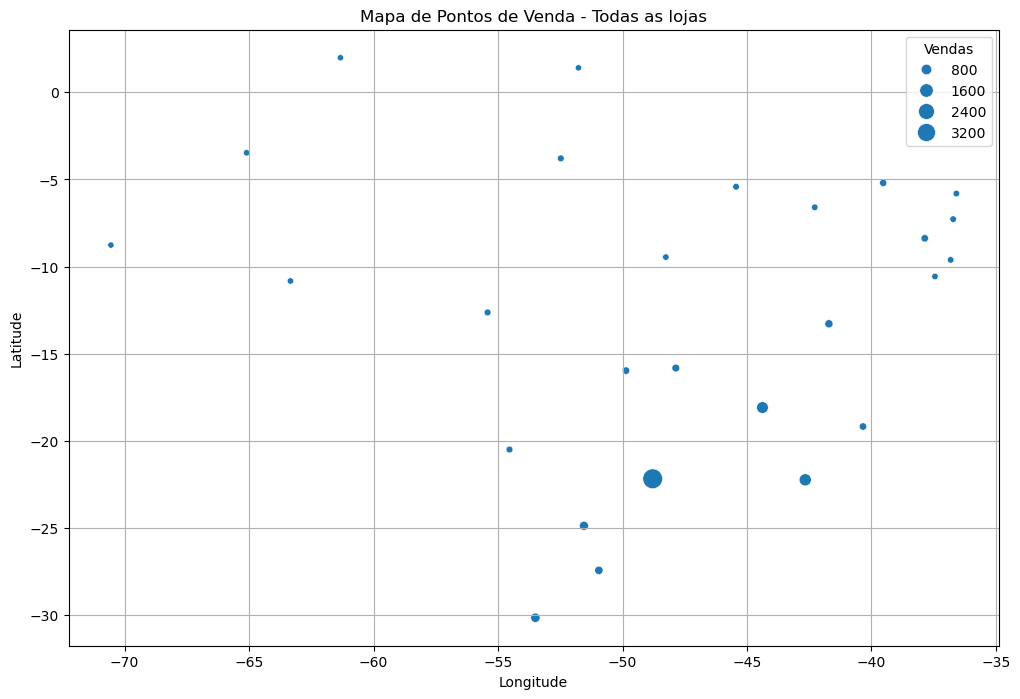

In [12]:
import seaborn as sns
# Realiza a concatenação de todos os dados por latitude e longitude e conta as vendas
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
mapaVendas = todas_lojas.groupby(['lat', 'lon'])['Produto'].count().reset_index(name='Vendas')
print(mapaVendas)

# Gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lon', y='lat', size='Vendas', sizes=(20, 200), data=mapaVendas)
plt.title('Mapa de Pontos de Venda - Todas as lojas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Heatmap

Neste mapa, decidi mostrar o total de vendas por cada local, sem a representação textual já que os dados estão explícitos.

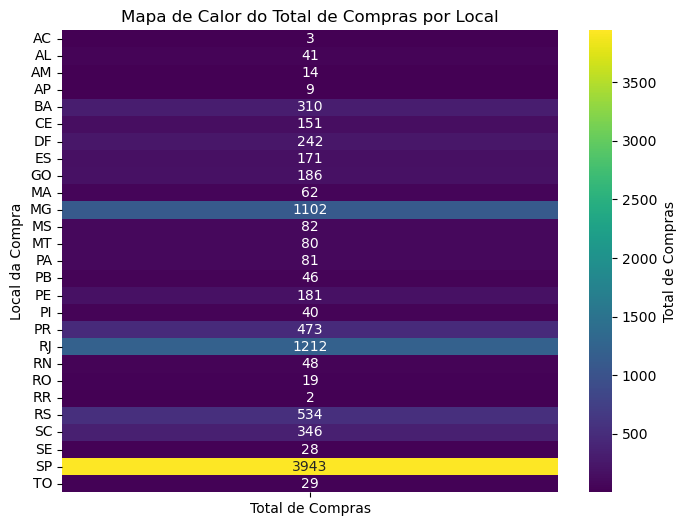

In [13]:
# Agrupa o total de vendas pelo local de compras.

localVendas = todas_lojas['Local da compra'].value_counts().reset_index()
localVendas.columns = ['Local da compra', 'Total de Compras']

# Criação da tabela pivô para o heatmap
heatmap_data = localVendas.pivot_table(index='Local da compra', values='Total de Compras', fill_value=0)
heatmap_data = heatmap_data.map(int)

# Geração do heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Total de Compras'})
plt.title('Mapa de Calor do Total de Compras por Local')
plt.xlabel('')
plt.ylabel('Local da Compra')
plt.xticks(rotation=0)
plt.show()